<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Deep%20Learning%20Course/Telecom_Churn_ANN_Binary_Cls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Author and Instructor of this Notebook is Shivam Modi.
## LinkedIn: https://www.linkedin.com/in/shivam-modi-datascientist/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [ ]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#### Churn - Repeat customer
df.shape

(7043, 21)

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#df['TotalCharges'] = df['TotalCharges'].astype(float)

df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df[df['TotalCharges']==' '].shape

(11, 21)

In [ ]:
df['tenure'][df['TotalCharges']==' ']

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ','0')
df.shape

(7043, 21)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df1 = df.copy()

In [ ]:
df.drop('customerID',axis=1,inplace=True)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [ ]:
for i in cat_cols:
    print(f'{i} | Unique {df[i].unique()}')

gender | Unique ['Female' 'Male']
Partner | Unique ['Yes' 'No']
Dependents | Unique ['No' 'Yes']
PhoneService | Unique ['No' 'Yes']
MultipleLines | Unique ['No phone service' 'No' 'Yes']
InternetService | Unique ['DSL' 'Fiber optic' 'No']
OnlineSecurity | Unique ['No' 'Yes' 'No internet service']
OnlineBackup | Unique ['Yes' 'No' 'No internet service']
DeviceProtection | Unique ['No' 'Yes' 'No internet service']
TechSupport | Unique ['No' 'Yes' 'No internet service']
StreamingTV | Unique ['No' 'Yes' 'No internet service']
StreamingMovies | Unique ['No' 'Yes' 'No internet service']
Contract | Unique ['Month-to-month' 'One year' 'Two year']
PaperlessBilling | Unique ['Yes' 'No']
PaymentMethod | Unique ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn | Unique ['No' 'Yes']


In [ ]:
df.replace(['No internet service','No phone service'],'No',inplace=True)

In [ ]:
for i in cat_cols:
    print(f'{i} | Unique {df[i].unique()}')

gender | Unique ['Female' 'Male']
Partner | Unique ['Yes' 'No']
Dependents | Unique ['No' 'Yes']
PhoneService | Unique ['No' 'Yes']
MultipleLines | Unique ['No' 'Yes']
InternetService | Unique ['DSL' 'Fiber optic' 'No']
OnlineSecurity | Unique ['No' 'Yes']
OnlineBackup | Unique ['Yes' 'No']
DeviceProtection | Unique ['No' 'Yes']
TechSupport | Unique ['No' 'Yes']
StreamingTV | Unique ['No' 'Yes']
StreamingMovies | Unique ['No' 'Yes']
Contract | Unique ['Month-to-month' 'One year' 'Two year']
PaperlessBilling | Unique ['Yes' 'No']
PaymentMethod | Unique ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn | Unique ['No' 'Yes']


### EDA

In [ ]:
print(len(cat_cols))

16


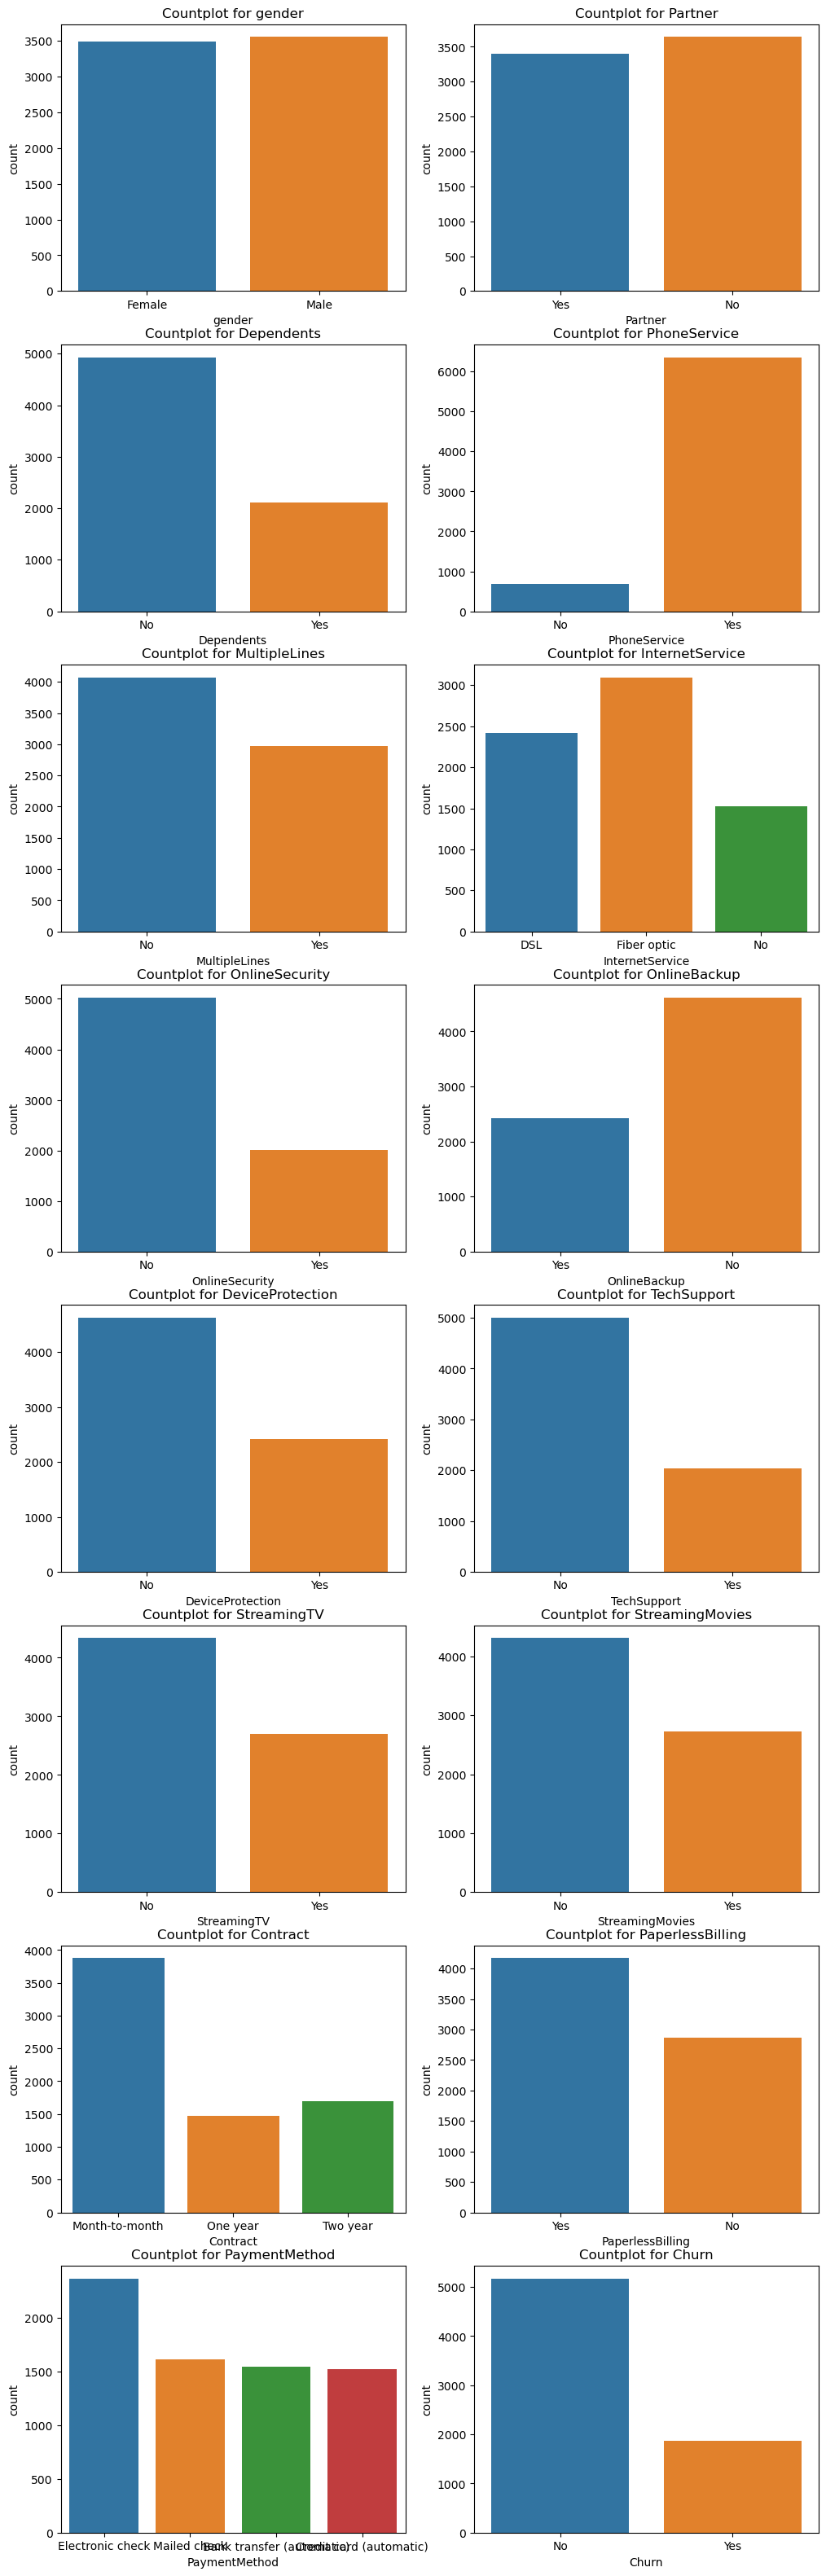

In [ ]:
plt.figure(figsize=(12,40))
for i in range(len(cat_cols)):
    plt.subplot(8,2,i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.title(f'Countplot for {cat_cols[i]}')
plt.show()

In [ ]:
len(num_cols)

4

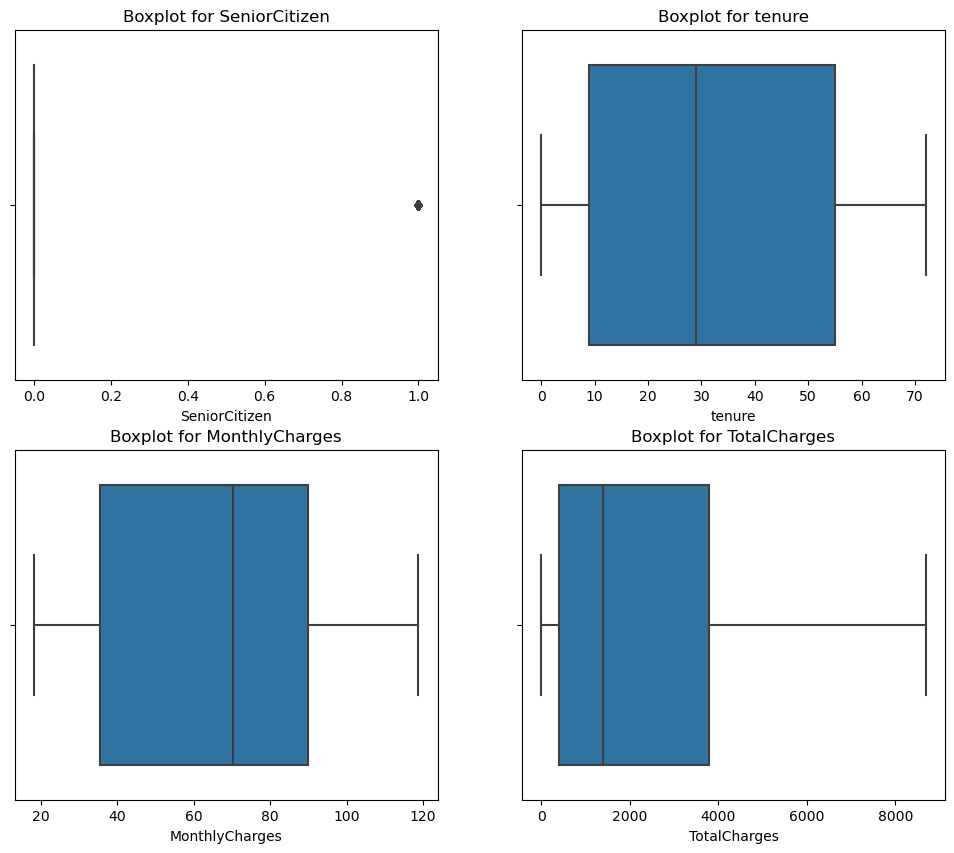

In [ ]:
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
plt.show()

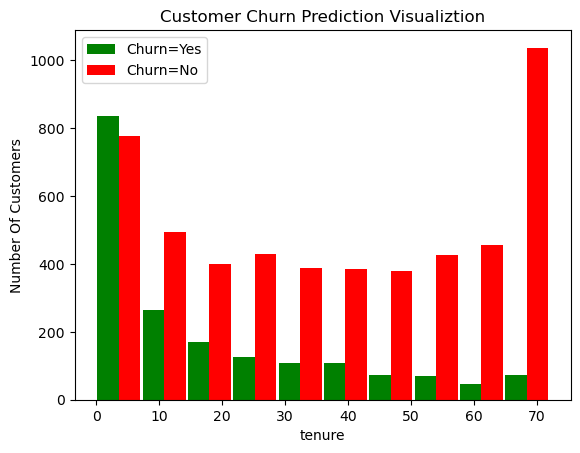

In [ ]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

#### Correlation

In [ ]:
corr = df.corr()

corr

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10120\4075633031.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df['Churn'] = df['Churn'].replace({'No':0,'Yes':1})
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
df['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

#### Encoding Categorical features

In [ ]:
cat_cols[:-1]

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
df_dum = pd.get_dummies(data=df,columns=cat_cols[:-1],drop_first=True)
print(df_dum.shape)
df_dum.columns

(7043, 24)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

#### Select x and y

In [ ]:
x = df_dum.drop('Churn',axis=1)
y = df_dum['Churn']
print(x.shape)
print(y.shape)

(7043, 23)
(7043,)


In [ ]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


#### Split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 23)
(2113, 23)
(4930,)
(2113,)


#### Import Libraries

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense,Dropout
from tensorflow.keras.optimizers import SGD, Adam, Adagrad

#### ANN Binary Classification Architecture

General Rules for Binary Classifiation
1) Activation used in Hidden Layer - Relu, leaky relu
2) Activation used in Last Layer - sigmoid
3) Cost Function - binary_crossentropy
4) Optimizer - adam, rmsprop, sgd

In [ ]:
# Binary Classification - binary_crossentropy or (Negative Log Likelihood) is the loss function
# Adam - Adaptive Moment Estimation - Best Known Optimizer
# RMSProp - Root Mean Square Propagation - Equally Good
# Stochastic (GD)- For Every epoch , it selects randomly 1 row and on that it applies derivative
# wnew = w - alpha*(dl/dw)

In [ ]:
x_train.shape

(4930, 23)

In [ ]:
m1= Sequential()
m1.add(Dense(46,activation='relu',input_dim=23,name='HL1'))
m1.add(Dense(23,activation='relu',name='HL2'))
m1.add(Dense(1,activation='sigmoid',name='Output_Layer'))
m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
m1.summary()

C:\Users\lenovo\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ HL1 (Dense)                          │ (None, 46)                  │           1,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL2 (Dense)                          │ (None, 23)                  │           1,081 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              24 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,209 (8.63 KB)

 Trainable params: 2,209 (8.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
h1= m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.6103 - loss: 29.0678 - val_acc: 0.3810 - val_loss: 8.0785
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6821 - loss: 5.7183 - val_acc: 0.7648 - val_loss: 2.1259
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7169 - loss: 1.5292 - val_acc: 0.7880 - val_loss: 1.0318
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7222 - loss: 1.7232 - val_acc: 0.7922 - val_loss: 1.0095
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7647 - loss: 0.7617 - val_acc: 0.7776 - val_loss: 1.4434
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7396 - loss: 1.4690 - val_acc: 0.7913 - val_loss: 0.9791
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7539 - loss: 0.8515 - val_acc: 0.6162 - val_loss: 0.9341
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7328 - loss: 0.9254 - val_acc: 0.7941 - val_loss: 0.6363
Epoch 9/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - a

In [ ]:
r1=pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail()

,acc,loss,val_acc,val_loss,Epochs
25,0.761460,0.980129,0.793185,0.781132,25
26,0.742799,1.429084,0.782773,2.453724,26
27,0.763083,0.805480,0.788926,1.085686,27
28,0.750710,0.922707,0.780407,0.478912,28
29,0.752333,0.963848,0.669664,0.732889,29


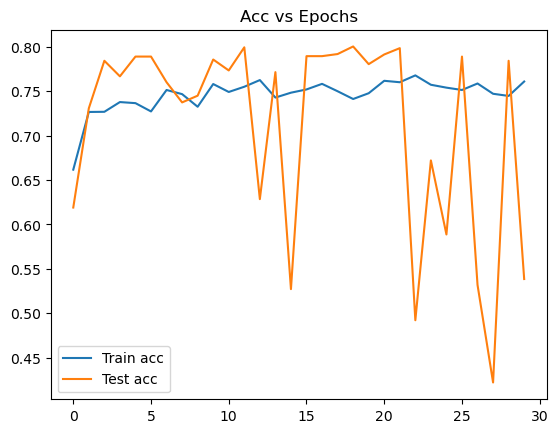

In [ ]:
plt.plot(r1['Epochs'],r1['acc'],label='Train acc')
plt.plot(r1['Epochs'],r1['val_acc'],label='Test acc')
plt.title(f'Acc vs Epochs')
plt.legend()
plt.show()

In [ ]:
m2= Sequential()
m2.add(Dense(46,activation='relu',input_dim=23,name='HL1'))
m2.add(Dense(23,activation='relu',name='HL2'))
m2.add(Dense(10,activation='relu',name='HL3'))
m2.add(Dense(1,activation='sigmoid',name='Output_Layer'))
m2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
m2.summary()

C:\Users\lenovo\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ HL1 (Dense)                          │ (None, 46)                  │           1,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL2 (Dense)                          │ (None, 23)                  │           1,081 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL3 (Dense)                          │ (None, 10)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,436 (9.52 KB)

 Trainable params: 2,436 (9.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
h2=m2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.6518 - loss: 8.3869 - val_acc: 0.7279 - val_loss: 0.9605
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6581 - loss: 6.1327 - val_acc: 0.7766 - val_loss: 6.1697
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.6942 - loss: 4.7027 - val_acc: 0.7733 - val_loss: 2.5893
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6939 - loss: 2.2145 - val_acc: 0.7738 - val_loss: 2.8243
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7143 - loss: 1.8551 - val_acc: 0.7459 - val_loss: 2.6652
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7212 - loss: 1.4760 - val_acc: 0.7648 - val_loss: 0.5018
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7236 - loss: 1.3870 - val_acc: 0.7809 - val_loss: 1.6077
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7417 - loss: 1.1115 - val_acc: 0.7719 - val_loss: 1.7287
Epoch 9/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - ac

In [ ]:
r2=pd.DataFrame(h2.history)
r2['Epochs']=h2.epoch
r2.tail()

,acc,loss,val_acc,val_loss,Epochs
25,0.779919,0.522539,0.796971,0.450474,25
26,0.781947,0.524408,0.560341,1.249988,26
27,0.775456,0.508014,0.795078,0.443488,27
28,0.774848,0.536066,0.780407,0.468572,28
29,0.779310,0.542909,0.787506,0.446340,29


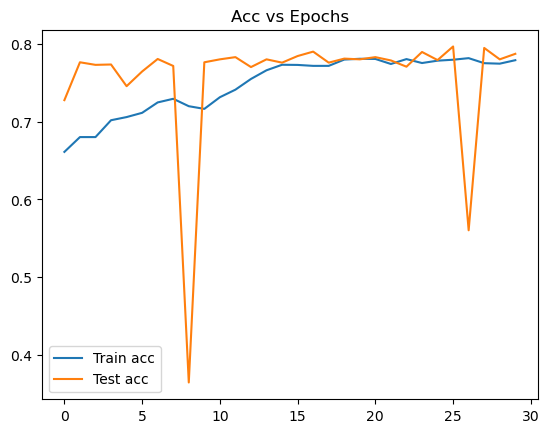

In [ ]:
plt.plot(r2['Epochs'],r2['acc'],label='Train acc')
plt.plot(r2['Epochs'],r2['val_acc'],label='Test acc')
plt.title(f'Acc vs Epochs')
plt.legend()
plt.show()

In [ ]:
ypred=m2.predict(x_test)
print(ypred[:5])

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0.4756317 ]
 [0.02644559]
 [0.00163723]
 [0.8204285 ]
 [0.09831548]]


In [ ]:
ypred_lab=[1 if i>0.5 else 0 for i in ypred]
print(ypred_lab[:10])

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.metrics import *

In [ ]:
cm= confusion_matrix(y_test,ypred_lab)
print(cm)
print(classification_report(y_test,ypred_lab))

[[1437  102]
 [ 347  227]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1539
           1       0.69      0.40      0.50       574

    accuracy                           0.79      2113
   macro avg       0.75      0.66      0.68      2113
weighted avg       0.77      0.79      0.77      2113

